# Лабораторная работа 1: Линейная регрессия

Цель: предсказать RiskScore для тестового набора данных используя линейную регрессию

## Импорт библиотек

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression as SklearnLR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

## 1. Загрузка данных

In [56]:
train_df = pd.read_csv('datasets/train.csv')
test_df = pd.read_csv('datasets/test.csv')

print(f"Train shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")
print(f"\nПервые строки train:")
train_df.head()

Train shape: (11017, 35)
Test shape: (5000, 35)

Первые строки train:


,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,JobTenure,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,RiskScore
0,2010-06-26,27.0,66829.0,549.0,17290.0,60.0,Divorced,1.0,Rent,1095.0,...,4.0,Employed,Associate,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,66.176500
1,1996-09-23,55.0,172147.0,850.0,16110.0,36.0,Widowed,1.0,Mortgage,211.0,...,2.0,Employed,High School,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,28.495737
2,2015-01-19,51.0,300000.0,850.0,38436.0,36.0,Married,0.0,Mortgage,546.0,...,3.0,Employed,Bachelor,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,34.488104
3,1981-05-12,25.0,34683.0,847.0,19186.0,48.0,Married,0.0,Other,153.0,...,3.0,Employed,High School,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,36.910753
4,1995-05-07,55.0,300000.0,850.0,30437.0,48.0,Single,2.0,Rent,562.0,...,5.0,Employed,Bachelor,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,31.347091


In [57]:
print("Информация о данных:")
train_df.info()

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             10487 non-null  object 
 1   Age                         10487 non-null  float64
 2   AnnualIncome                10487 non-null  float64
 3   CreditScore                 9986 non-null   float64
 4   LoanAmount                  9986 non-null   float64
 5   LoanDuration                10487 non-null  float64
 6   MaritalStatus               10487 non-null  object 
 7   NumberOfDependents          10487 non-null  float64
 8   HomeOwnershipStatus         10487 non-null  object 
 9   MonthlyDebtPayments         9986 non-null   float64
 10  CreditCardUtilizationRate   10487 non-null  float64
 11  NumberOfOpenCreditLines     10487 non-null  float64
 12  NumberOfCreditInquiries     10487 non-null  float64
 13  DebtToInco

In [58]:
print("Статистика числовых признаков:")
train_df.describe()

Статистика числовых признаков:


,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,RiskScore
count,10487.000000,10487.000000,9986.000000,9986.000000,10487.000000,10487.000000,9986.000000,10487.000000,10487.000000,10487.000000,...,10487.000000,10487.000000,10487.000000,10487.000000,9.986000e+03,9986.000000,10487.000000,10487.000000,10487.000000,1.048700e+04
mean,39.850386,131587.872127,678.082716,29874.218306,53.439878,1.568323,546.458642,0.284397,3.033565,0.979498,...,10838.934141,0.784428,4.949271,17.628302,1.542381e+05,0.200392,0.200112,1075.622426,0.517577,-2.569878e+04
std,11.614132,115791.941909,175.192486,27705.509722,24.493562,1.418684,501.981888,0.159240,1.740186,0.990927,...,9385.924858,0.123039,2.201100,11.337248,4.622229e+05,0.094388,0.096458,1344.053181,0.894637,1.431675e+06
min,18.000000,15000.000000,300.000000,1063.000000,12.000000,0.000000,13.000000,0.003674,0.000000,0.000000,...,1250.000000,0.259301,0.000000,0.000000,1.004000e+03,0.052494,0.046445,30.008506,0.006064,-9.999999e+06
25%,32.000000,20959.500000,550.000000,12658.000000,36.000000,0.000000,233.250000,0.158929,2.000000,0.000000,...,1683.541667,0.708475,3.000000,9.000000,7.252500e+03,0.119908,0.119548,375.872620,0.066734,3.256475e+01
50%,40.000000,89015.000000,722.500000,21828.500000,48.000000,1.000000,398.000000,0.262229,3.000000,1.000000,...,7371.250000,0.803692,5.000000,17.000000,2.742950e+04,0.182023,0.180710,684.878529,0.178193,4.411876e+01
75%,48.000000,257025.000000,850.000000,37158.000000,60.000000,3.000000,685.000000,0.391683,4.000000,2.000000,...,21232.583333,0.879312,6.000000,26.000000,1.241758e+05,0.264709,0.264880,1279.930203,0.637457,6.535690e+01
max,80.000000,748508.000000,850.000000,418997.000000,120.000000,6.000000,10879.000000,0.914635,12.000000,6.000000,...,25000.000000,0.996573,17.000000,57.000000,1.126117e+07,0.722497,0.833647,29634.807816,24.383046,1.000000e+07


In [59]:
print(f"Пропуски в train:\n{train_df.isnull().sum()[train_df.isnull().sum() > 0]}")
print(f"\nПропуски в test:\n{test_df.isnull().sum()[test_df.isnull().sum() > 0]}")

Пропуски в train:
ApplicationDate                530
Age                            530
AnnualIncome                   530
CreditScore                   1031
LoanAmount                    1031
LoanDuration                   530
MaritalStatus                  530
NumberOfDependents             530
HomeOwnershipStatus            530
MonthlyDebtPayments           1031
CreditCardUtilizationRate      530
NumberOfOpenCreditLines        530
NumberOfCreditInquiries        530
DebtToIncomeRatio              530
BankruptcyHistory             1031
LoanPurpose                   1031
PreviousLoanDefaults           530
PaymentHistory                 530
LengthOfCreditHistory          530
SavingsAccountBalance          530
CheckingAccountBalance        1031
TotalAssets                   1031
TotalLiabilities               530
MonthlyIncome                  530
UtilityBillsPaymentHistory     530
JobTenure                      530
EmploymentStatus               530
EducationLevel                 530
Ex

## 2. Разведочный анализ данных (EDA)

### Распределение целевой переменной RiskScore

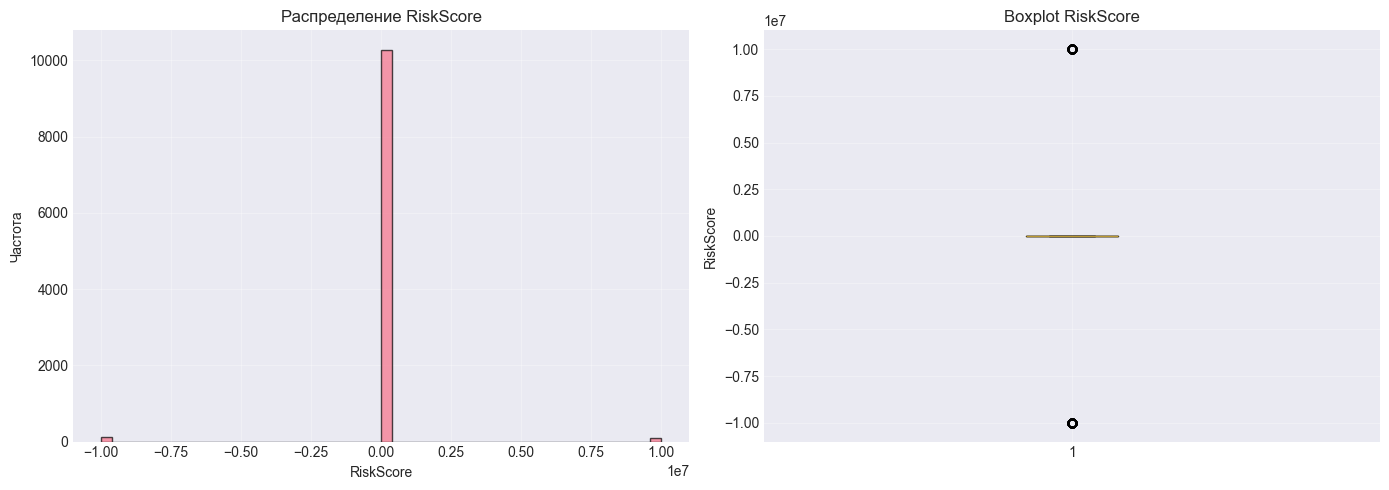

Среднее RiskScore: -25698.78
Медиана RiskScore: 44.12
Стандартное отклонение: 1431674.59


In [60]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(train_df['RiskScore'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('RiskScore')
plt.ylabel('Частота')
plt.title('Распределение RiskScore')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(train_df['RiskScore'].dropna())
plt.ylabel('RiskScore')
plt.title('Boxplot RiskScore')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Среднее RiskScore: {train_df['RiskScore'].mean():.2f}")
print(f"Медиана RiskScore: {train_df['RiskScore'].median():.2f}")
print(f"Стандартное отклонение: {train_df['RiskScore'].std():.2f}")

### Анализ зависимостей признаков

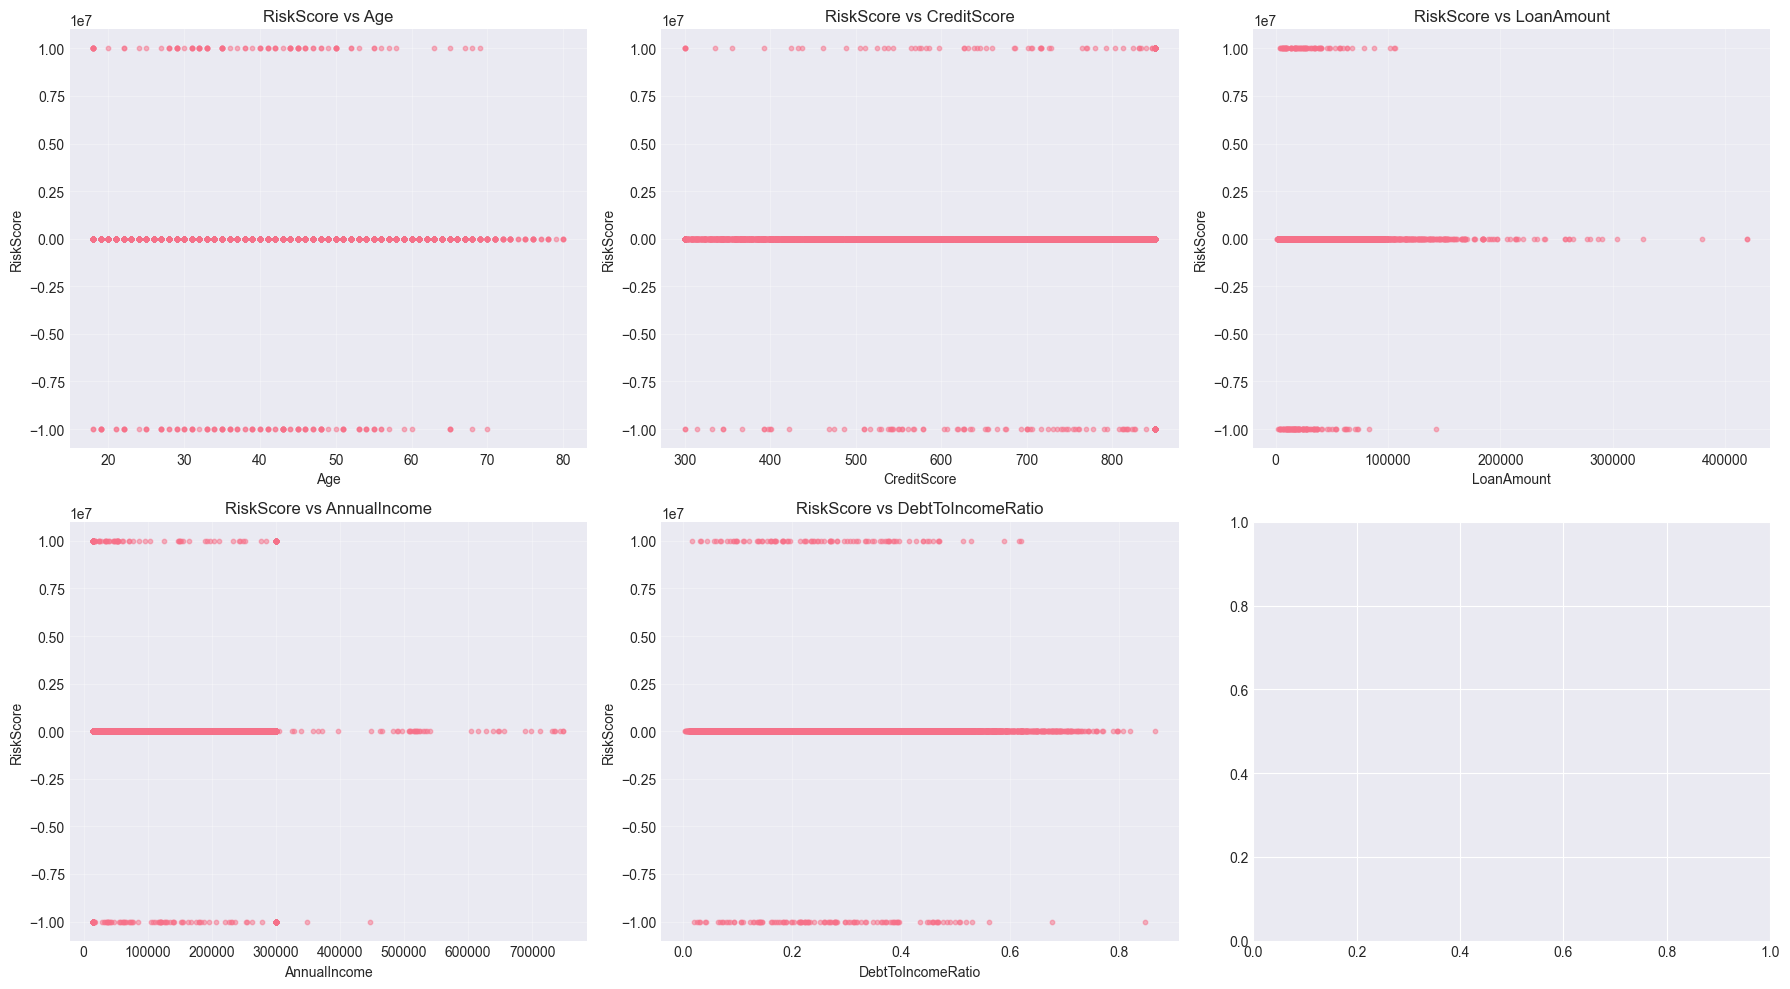

In [61]:
key_features = ['Age', 'CreditScore', 'LoanAmount', 'AnnualIncome', 'DebtToIncomeRatio', 'RiskScore']
valid_features = [f for f in key_features if f in train_df.columns]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, feature in enumerate(valid_features[:-1]):
    data_clean = train_df[[feature, 'RiskScore']].dropna()
    axes[idx].scatter(data_clean[feature], data_clean['RiskScore'], alpha=0.5, s=10)
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('RiskScore')
    axes[idx].set_title(f'RiskScore vs {feature}')
    axes[idx].grid(True, alpha=0.3)

if len(valid_features) < 6:
    for idx in range(len(valid_features)-1, 6):
        fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

### Матрица корреляций для числовых признаков

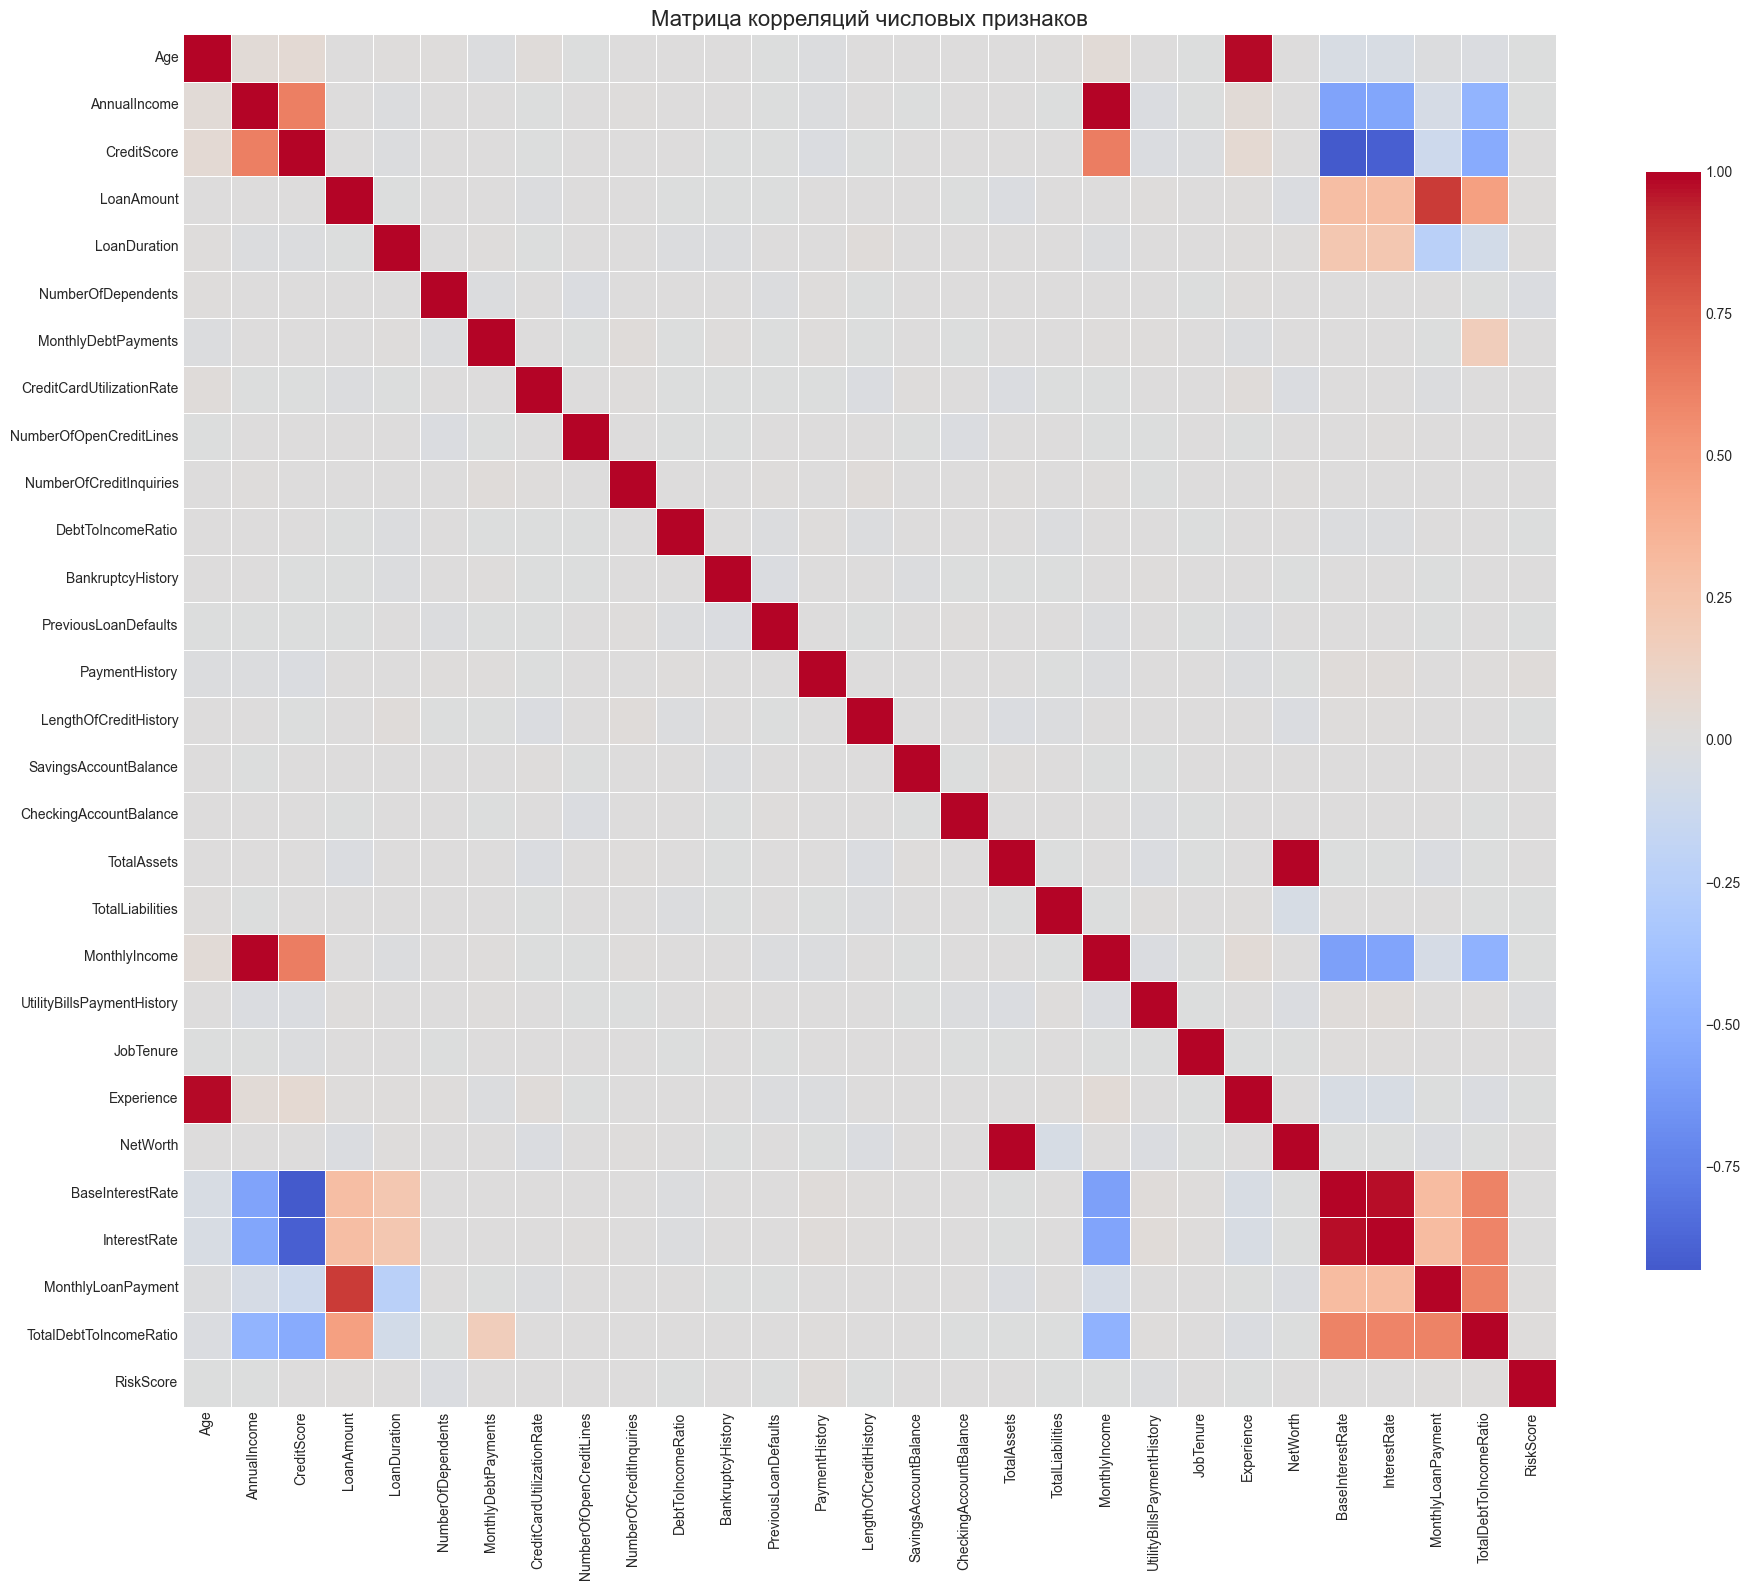

In [62]:
numeric_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()
correlation_matrix = train_df[numeric_cols].corr()

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Матрица корреляций числовых признаков', fontsize=16)
plt.tight_layout()
plt.show()

In [63]:
risk_corr = correlation_matrix['RiskScore'].sort_values(ascending=False)
print("Топ-15 признаков по корреляции с RiskScore:")
print(risk_corr.head(15))

Топ-15 признаков по корреляции с RiskScore:
RiskScore                    1.000000
PaymentHistory               0.019144
TotalDebtToIncomeRatio       0.013879
MonthlyLoanPayment           0.012366
LoanAmount                   0.011771
NumberOfCreditInquiries      0.011055
NetWorth                     0.008804
TotalAssets                  0.008092
SavingsAccountBalance        0.007611
CreditCardUtilizationRate    0.005501
BankruptcyHistory            0.005184
JobTenure                    0.003822
InterestRate                 0.003388
CreditScore                  0.002383
BaseInterestRate             0.002081
Name: RiskScore, dtype: float64


**Выводы EDA:**
- RiskScore имеет большой разброс значений с выбросами
- Наблюдается сильная корреляция между некоторыми признаками (например, AnnualIncome и MonthlyIncome)
- Присутствуют пропущенные значения в некоторых признаках
- Аномальное значение -9999999 в RiskScore требует обработки

## 3. Предобработка данных

In [64]:
def preprocess_data(df, is_train=True):
    df = df.copy()
    
    if is_train and 'RiskScore' in df.columns:
        df = df[df['RiskScore'] > -1000000]
    
    if 'ApplicationDate' in df.columns:
        df['ApplicationDate'] = pd.to_datetime(df['ApplicationDate'])
        df['Year'] = df['ApplicationDate'].dt.year
        df['Month'] = df['ApplicationDate'].dt.month
        df['DayOfWeek'] = df['ApplicationDate'].dt.dayofweek
        df['DayOfYear'] = df['ApplicationDate'].dt.dayofyear
        df = df.drop('ApplicationDate', axis=1)
    
    if 'UtilityBillsPaymentHistory' in df.columns:
        def parse_utility(val):
            if pd.isna(val):
                return np.nan
            if isinstance(val, (int, float)):
                return val
            try:
                if isinstance(val, str) and '[' in val:
                    nums = eval(val)
                    return np.mean(nums) if nums else np.nan
                return float(val)
            except:
                return np.nan
        
        df['UtilityBillsPaymentHistory'] = df['UtilityBillsPaymentHistory'].apply(parse_utility)
    
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    for col in categorical_cols:
        df[col] = df[col].astype('category').cat.codes
    
    return df

train_processed = preprocess_data(train_df, is_train=True)
test_processed = preprocess_data(test_df, is_train=False)

print(f"Train shape после предобработки: {train_processed.shape}")
print(f"Test shape после предобработки: {test_processed.shape}")

Train shape после предобработки: (10366, 38)
Test shape после предобработки: (5000, 38)


### Очистка выбросов в целевой переменной

Строк до очистки: 10366
Удалено по логике (<0 или >100): 94
Удалено статистическими методами: 0
Итоговый Train shape: (10272, 38)
RiskScore range: [14.84, 97.60]


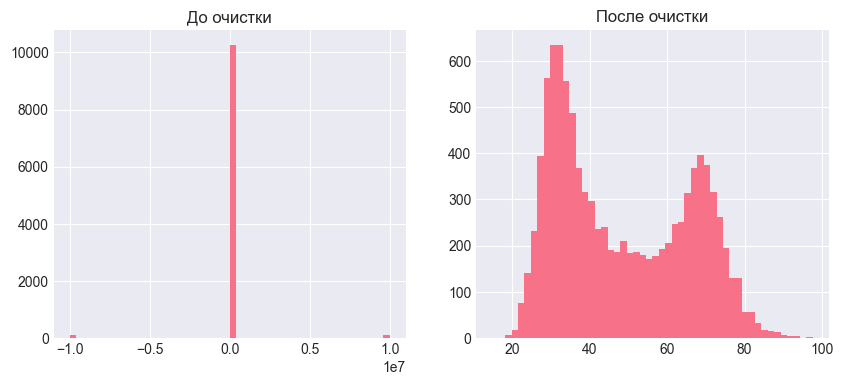

In [65]:
from scipy import stats

# 1. Логические границы (Hard Limits)
# RiskScore не может быть отрицательным или больше 100 (если это проценты/баллы)
mask_logic = (train_processed['RiskScore'] >= 0) & (train_processed['RiskScore'] <= 100)
print(f"Строк до очистки: {len(train_processed)}")
train_processed = train_processed[mask_logic]

# 2. Метод Z-Score (удаляем все, что дальше 3 стандартных отклонений)
# Хорошо работает, если распределение похоже на нормальное
z_scores = np.abs(stats.zscore(train_processed['RiskScore']))
mask_zscore = z_scores < 3.0

# 3. Метод Modified Z-Score (через MAD - Median Absolute Deviation)
# Это более мощный метод, он устойчив к самим выбросам (в отличие от обычного Z-Score)
median = np.median(train_processed['RiskScore'])
diff = np.abs(train_processed['RiskScore'] - median)
mad = np.median(diff)
# 0.6745 - коэффициент согласования с нормальным распределением
modified_z_scores = 0.6745 * diff / (mad + 1e-6) # +1e-6 для защиты от деления на 0
mask_mad = modified_z_scores < 3.5

# 4. Применяем фильтры
# Можно использовать комбинацию ("И") или выбрать только один метод.
# Обычно MAD работает лучше всего для грязных данных.
# Здесь мы берем пересечение: точка должна быть нормальной и по Z-Score, и по MAD.

train_clean = train_processed[mask_zscore & mask_mad].copy()

print(f"Удалено по логике (<0 или >100): {(~mask_logic).sum()}")
print(f"Удалено статистическими методами: {len(train_processed) - len(train_clean)}")
print(f"Итоговый Train shape: {train_clean.shape}")
print(f"RiskScore range: [{train_clean['RiskScore'].min():.2f}, {train_clean['RiskScore'].max():.2f}]")

# Визуализация после очистки (опционально, для контроля)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1); plt.title("До очистки"); plt.hist(train_df['RiskScore'], bins=50);
plt.subplot(1, 2, 2); plt.title("После очистки"); plt.hist(train_clean['RiskScore'], bins=50);
plt.show()

### Feature Engineering - создание новых признаков

In [66]:
def create_features(df):
    df = df.copy()
    
    # Логарифмы для skewed распределений
    for col in ['LoanAmount', 'AnnualIncome', 'MonthlyIncome', 'TotalAssets', 'TotalLiabilities']:
        if col in df.columns:
            df[f'{col}_log'] = np.log1p(df[col].fillna(0))
    
    # Квадраты важных признаков
    for col in ['CreditScore', 'Age', 'Experience']:
        if col in df.columns:
            df[f'{col}_sq'] = df[col] ** 2
    
    # Соотношения долга
    if 'LoanAmount' in df.columns and 'AnnualIncome' in df.columns:
        df['LoanToIncome'] = df['LoanAmount'] / (df['AnnualIncome'] + 1)
        df['LoanToIncome_sq'] = df['LoanToIncome'] ** 2
    
    if 'MonthlyDebtPayments' in df.columns and 'MonthlyIncome' in df.columns:
        df['MonthlyDebtRatio'] = df['MonthlyDebtPayments'] / (df['MonthlyIncome'] + 1)
        df['MonthlyDebtRatio_sq'] = df['MonthlyDebtRatio'] ** 2
    
    if 'MonthlyLoanPayment' in df.columns and 'MonthlyIncome' in df.columns:
        df['LoanPaymentRatio'] = df['MonthlyLoanPayment'] / (df['MonthlyIncome'] + 1)
    
    # Соотношения активов
    if 'TotalAssets' in df.columns and 'TotalLiabilities' in df.columns:
        df['AssetLiabilityRatio'] = df['TotalAssets'] / (df['TotalLiabilities'] + 1)
        df['NetAssets'] = df['TotalAssets'] - df['TotalLiabilities']
    
    # Взаимодействия
    if 'CreditScore' in df.columns and 'Age' in df.columns:
        df['CreditPerAge'] = df['CreditScore'] / (df['Age'] + 1)
        df['Credit_Age_Product'] = df['CreditScore'] * df['Age'] / 1000
    
    if 'Experience' in df.columns and 'Age' in df.columns:
        df['ExperiencePerAge'] = df['Experience'] / (df['Age'] + 1)
    
    if 'SavingsAccountBalance' in df.columns and 'CheckingAccountBalance' in df.columns:
        df['TotalLiquid'] = df['SavingsAccountBalance'] + df['CheckingAccountBalance']
        df['TotalLiquid_log'] = np.log1p(df['TotalLiquid'])
    
    if 'LoanDuration' in df.columns and 'LoanAmount' in df.columns:
        df['MonthlyLoanBurden'] = df['LoanAmount'] / (df['LoanDuration'] + 1)
    
    if 'MaritalStatus' in df.columns and 'NumberOfDependents' in df.columns:
        df['Family_Status'] = df['MaritalStatus'] * 10 + df['NumberOfDependents']
    
    if 'EmploymentStatus' in df.columns and 'JobTenure' in df.columns:
        df['Employment_Stability'] = df['EmploymentStatus'] * df['JobTenure']
    
    return df

train_clean = create_features(train_clean)
test_processed = create_features(test_processed)

print(f"Создано множество новых признаков включая логарифмы, квадраты и взаимодействия")
print(f"Train shape: {train_clean.shape}")
print(f"Test shape: {test_processed.shape}")

Создано множество новых признаков включая логарифмы, квадраты и взаимодействия
Train shape: (10272, 61)
Test shape: (5000, 61)


### Удаление высококоррелированных признаков (>98%)

In [67]:
numeric_features = train_clean.select_dtypes(include=[np.number]).columns.tolist()
if 'RiskScore' in numeric_features:
    numeric_features.remove('RiskScore')

corr_matrix = train_clean[numeric_features].corr().abs()

upper_triangle = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.95)]

print(f"Признаки с корреляцией >95%: {to_drop}")
print(f"Количество удаляемых признаков: {len(to_drop)}")

train_clean = train_clean.drop(columns=to_drop)
test_processed = test_processed.drop(columns=[col for col in to_drop if col in test_processed.columns])

print(f"Train shape после удаления: {train_clean.shape}")
print(f"Test shape после удаления: {test_processed.shape}")

Признаки с корреляцией >95%: ['MonthlyIncome', 'Experience', 'NetWorth', 'InterestRate', 'DayOfYear', 'MonthlyIncome_log', 'CreditScore_sq', 'Age_sq', 'Experience_sq', 'LoanPaymentRatio', 'ExperiencePerAge', 'Family_Status']
Количество удаляемых признаков: 12
Train shape после удаления: (10272, 49)
Test shape после удаления: (5000, 49)


### Обработка пропусков

In [68]:
numeric_cols = train_clean.select_dtypes(include=[np.number]).columns.tolist()
if 'RiskScore' in numeric_cols:
    numeric_cols.remove('RiskScore')

for col in numeric_cols:
    if train_clean[col].isnull().sum() > 0:
        median_val = train_clean[col].median()
        train_clean[col].fillna(median_val, inplace=True)
        if col in test_processed.columns:
            test_processed[col].fillna(median_val, inplace=True)

print(f"Пропуски после обработки в train: {train_clean.isnull().sum().sum()}")
print(f"Пропуски после обработки в test: {test_processed.isnull().sum().sum()}")

Пропуски после обработки в train: 0
Пропуски после обработки в test: 0


### Подготовка данных для моделирования

In [69]:
y_train = train_clean['RiskScore'].values
X_train = train_clean.drop('RiskScore', axis=1)

if 'ID' in test_processed.columns:
    test_ids = test_processed['ID'].values
    X_test = test_processed.drop('ID', axis=1)
else:
    test_ids = np.arange(len(test_processed))
    X_test = test_processed.copy()

common_features = list(set(X_train.columns) & set(X_test.columns))
X_train = X_train[common_features]
X_test = X_test[common_features]

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Количество признаков: {len(common_features)}")

X_train shape: (10272, 48)
y_train shape: (10272,)
X_test shape: (5000, 48)
Количество признаков: 48


## 4. Реализация нормализации данных

In [70]:
class ZScoreNormalizer:
    def __init__(self):
        self.mean_ = None
        self.std_ = None
    
    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.std_ = np.std(X, axis=0)
        self.std_[self.std_ == 0] = 1
        return self
    
    def transform(self, X):
        return (X - self.mean_) / self.std_
    
    def fit_transform(self, X):
        return self.fit(X).transform(X)

class MinMaxNormalizer:
    def __init__(self):
        self.min_ = None
        self.max_ = None
    
    def fit(self, X):
        self.min_ = np.min(X, axis=0)
        self.max_ = np.max(X, axis=0)
        self.range_ = self.max_ - self.min_
        self.range_[self.range_ == 0] = 1
        return self
    
    def transform(self, X):
        return (X - self.min_) / self.range_
    
    def fit_transform(self, X):
        return self.fit(X).transform(X)

print("Нормализаторы реализованы: ZScoreNormalizer и MinMaxNormalizer")

Нормализаторы реализованы: ZScoreNormalizer и MinMaxNormalizer


## Улучшенная предобработка с PolynomialFeatures и SelectPercentile

### Вспомогательные функции

In [71]:
EPS = 1e-3

def signed_log1p(data):
    return np.sign(data) * np.log1p(np.abs(data))

def augment_features_advanced(df):
    df = df.copy()
    
    EPS = 1e-3
    
    # --- 1. ЛОГАРИФМЫ ДЛЯ КЛЮЧЕВЫХ ПРИЗНАКОВ ---
    log_columns = ['AnnualIncome', 'LoanAmount', 'MonthlyDebtPayments', 'TotalAssets', 
                   'TotalLiabilities', 'NetWorth', 'MonthlyIncome']
    for col in log_columns:
        if col in df.columns:
            df[f'Log_{col}'] = np.log1p(df[col].clip(lower=0))
    
    # --- 2. ПРОСТЫЕ КВАДРАТЫ ---
    if 'CreditScore' in df.columns:
        df['CreditScore_Sq'] = df['CreditScore'] ** 2
    
    if 'Age' in df.columns:
        df['Age_Sq'] = df['Age'] ** 2
    
    # --- 3. КЛЮЧЕВЫЕ ФИНАНСОВЫЕ СООТНОШЕНИЯ ---
    # Эти признаки были наиболее важными в реализации с MSE < 25
    if 'InterestRate' in df.columns and 'BaseInterestRate' in df.columns:
        df["InterestRateSpread"] = df["InterestRate"] - df["BaseInterestRate"]
    
    if 'LoanAmount' in df.columns and 'AnnualIncome' in df.columns:
        df["LoanToIncome"] = df["LoanAmount"] / (df["AnnualIncome"] + EPS)
    
    if 'MonthlyLoanPayment' in df.columns and 'MonthlyDebtPayments' in df.columns and 'MonthlyIncome' in df.columns:
        total_debt = df["MonthlyLoanPayment"] + df["MonthlyDebtPayments"]
        df["DebtServiceRatio"] = total_debt / (df["MonthlyIncome"] + EPS)
        df["DisposableIncome"] = df["MonthlyIncome"] - total_debt
    
    if 'TotalAssets' in df.columns and 'TotalLiabilities' in df.columns:
        df["AssetCoverage"] = df["TotalAssets"] / (df["TotalLiabilities"] + EPS)
        df["NetAssets"] = df["TotalAssets"] - df["TotalLiabilities"]
    
    if 'NetWorth' in df.columns:
        if 'TotalLiabilities' in df.columns:
            df["NetWorthToLiabilities"] = df["NetWorth"] / (df["TotalLiabilities"] + EPS)
        if 'AnnualIncome' in df.columns:
            df["NetWorthToIncome"] = df["NetWorth"] / (df["AnnualIncome"] + EPS)
    
    # --- 4. КРЕДИТНЫЕ ПАРАМЕТРЫ ---
    if 'CreditCardUtilizationRate' in df.columns and 'NumberOfOpenCreditLines' in df.columns:
        df["UtilizationPerLine"] = df["CreditCardUtilizationRate"] / (df["NumberOfOpenCreditLines"] + 1)
    
    if 'NumberOfCreditInquiries' in df.columns and 'NumberOfOpenCreditLines' in df.columns:
        df["InquiryPerLine"] = df["NumberOfCreditInquiries"] / (df["NumberOfOpenCreditLines"] + 1)
    
    # --- 5. ДЕМОГРАФИЧЕСКИЕ ПАРАМЕТРЫ ---
    if 'AnnualIncome' in df.columns and 'NumberOfDependents' in df.columns:
        df["IncomePerDependent"] = df["AnnualIncome"] / (df["NumberOfDependents"] + 1)
    
    if 'Experience' in df.columns and 'Age' in df.columns:
        df["ExperienceToAge"] = df["Experience"] / (df["Age"] + EPS)
        df["AgeAfterExperience"] = df["Age"] - df["Experience"]
    
    if 'LengthOfCreditHistory' in df.columns and 'Age' in df.columns:
        df["CreditHistoryToAge"] = df["LengthOfCreditHistory"] / (df["Age"] + EPS)
    
    # --- 6. ВЗАИМОДЕЙСТВИЯ МЕЖДУ ВАЖНЫМИ ПРИЗНАКАМИ ---
    if 'CreditScore' in df.columns and 'AnnualIncome' in df.columns:
        df['Credit_x_Income'] = df['CreditScore'] * np.log1p(df['AnnualIncome'])
    
    if 'CreditScore' in df.columns and 'DebtToIncomeRatio' in df.columns:
        df['Credit_x_DTI'] = df['CreditScore'] * df['DebtToIncomeRatio']
    
    if 'Age' in df.columns and 'CreditScore' in df.columns:
        df['Age_x_Credit'] = df['Age'] * df['CreditScore'] / 100
    
    # --- 7. ПРОСТОЙ БИННИНГ ---
    if 'CreditScore' in df.columns:
        df['CreditScore_Bin'] = pd.cut(df['CreditScore'], bins=5, labels=False).astype(str)
    
    if 'AnnualIncome' in df.columns:
        df['AnnualIncome_Bin'] = pd.cut(df['AnnualIncome'], bins=5, labels=False).astype(str)
    
    if 'Age' in df.columns:
        df['Age_Bin'] = pd.cut(df['Age'], bins=5, labels=False).astype(str)
    
    return df

### Применение предобработки

In [72]:
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.linear_model import LinearRegression

# Очистка целевой переменной (важное изменение!)
train_clean['RiskScore'] = train_clean['RiskScore'].clip(0.0, 100.0)

# Применяем расширенный feature engineering
train_improved = augment_features_advanced(train_clean.copy())
test_improved = augment_features_advanced(test_processed.copy())

print(f"После расширенного feature engineering:")
print(f"Train: {train_improved.shape}")
print(f"Test: {test_improved.shape}")

# Подготовка данных
y_train_new = train_improved['RiskScore'].values
X_train_new = train_improved.drop('RiskScore', axis=1)

if 'ID' in test_improved.columns:
    test_ids_new = test_improved['ID'].values
    X_test_new = test_improved.drop('ID', axis=1)
else:
    test_ids_new = np.arange(len(test_improved))
    X_test_new = test_improved.copy()

# Разделение на числовые и категориальные
numeric_cols_new = [col for col in X_train_new.columns if np.issubdtype(X_train_new[col].dtype, np.number)]
cat_cols_new = [col for col in X_train_new.columns if col not in numeric_cols_new]

print(f"\nЧисловых: {len(numeric_cols_new)}, Категориальных: {len(cat_cols_new)}")

# Заполнение пропусков
num_medians_new = X_train_new[numeric_cols_new].median()
X_train_new[numeric_cols_new] = X_train_new[numeric_cols_new].fillna(num_medians_new)
X_test_new[numeric_cols_new] = X_test_new[numeric_cols_new].fillna(num_medians_new)

if len(cat_cols_new) > 0:
    cat_modes_new = X_train_new[cat_cols_new].mode().iloc[0]
    X_train_new[cat_cols_new] = X_train_new[cat_cols_new].fillna(cat_modes_new)
    X_test_new[cat_cols_new] = X_test_new[cat_cols_new].fillna(cat_modes_new)

# Применяем signed_log1p
print("\nПрименение signed_log1p трансформации...")
X_train_new[numeric_cols_new] = signed_log1p(X_train_new[numeric_cols_new].values)
X_test_new[numeric_cols_new] = signed_log1p(X_test_new[numeric_cols_new].values)

# Z-Score нормализация
z_normalizer = ZScoreNormalizer()
X_train_new[numeric_cols_new] = z_normalizer.fit_transform(X_train_new[numeric_cols_new].values)
X_test_new[numeric_cols_new] = z_normalizer.transform(X_test_new[numeric_cols_new].values)

print("Z-Score нормализация применена")

После расширенного feature engineering:
Train: (10272, 67)
Test: (5000, 67)

Числовых: 63, Категориальных: 3

Применение signed_log1p трансформации...
Z-Score нормализация применена


### PolynomialFeatures - создание взаимодействий

In [73]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train_new[numeric_cols_new])

poly_train = poly.transform(X_train_new[numeric_cols_new])
poly_test = poly.transform(X_test_new[numeric_cols_new])

poly_cols = poly.get_feature_names_out(numeric_cols_new)
poly_df_train = pd.DataFrame(poly_train, columns=poly_cols, index=X_train_new.index)
poly_df_test = pd.DataFrame(poly_test, columns=poly_cols, index=X_test_new.index)

# Нормализация полиномиальных признаков
z_normalizer_poly = ZScoreNormalizer()
poly_df_train = pd.DataFrame(
    z_normalizer_poly.fit_transform(poly_df_train.values),
    columns=poly_cols,
    index=poly_df_train.index
)
poly_df_test = pd.DataFrame(
    z_normalizer_poly.transform(poly_df_test.values),
    columns=poly_cols,
    index=poly_df_test.index
)

print(f"PolynomialFeatures создано: {poly_df_train.shape[1]} признаков")

PolynomialFeatures создано: 2079 признаков


### OneHotEncoder для категориальных признаков

In [74]:
if len(cat_cols_new) > 0:
    ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    ohe.fit(X_train_new[cat_cols_new])
    
    cat_encoded_train = ohe.transform(X_train_new[cat_cols_new])
    cat_encoded_test = ohe.transform(X_test_new[cat_cols_new])
    
    cat_cols_encoded = ohe.get_feature_names_out(cat_cols_new)
    cat_df_train = pd.DataFrame(cat_encoded_train, columns=cat_cols_encoded, index=X_train_new.index)
    cat_df_test = pd.DataFrame(cat_encoded_test, columns=cat_cols_encoded, index=X_test_new.index)
    
    X_full_train = pd.concat([X_train_new[numeric_cols_new], poly_df_train, cat_df_train], axis=1)
    X_full_test = pd.concat([X_test_new[numeric_cols_new], poly_df_test, cat_df_test], axis=1)
    
    print(f"OneHotEncoder создано: {cat_df_train.shape[1]} признаков")
else:
    X_full_train = pd.concat([X_train_new[numeric_cols_new], poly_df_train], axis=1)
    X_full_test = pd.concat([X_test_new[numeric_cols_new], poly_df_test], axis=1)

print(f"\nВсего признаков до отбора: {X_full_train.shape[1]}")

OneHotEncoder создано: 15 признаков

Всего признаков до отбора: 2157


### SelectPercentile - отбор лучших признаков

In [75]:
PERCENTILE = 25

selector = SelectPercentile(score_func=f_regression, percentile=PERCENTILE)
selector.fit(X_full_train, y_train_new)

X_selected_train = selector.transform(X_full_train)
X_selected_test = selector.transform(X_full_test)

print(f"SelectPercentile (топ {PERCENTILE}%): {X_selected_train.shape[1]} признаков отобрано")

SelectPercentile (топ 25%): 539 признаков отобрано


### Обучение улучшенной модели

In [76]:
from sklearn.model_selection import cross_val_score

print("\nОбучение LinearRegression модели...")

# Используем обычный LinearRegression (без регуляризации)
improved_model = LinearRegression()

# Кросс-валидация
cv_scores = cross_val_score(improved_model, X_selected_train, y_train_new, 
                           cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()
cv_std = cv_scores.std()

print(f"Cross-Validation MSE: {cv_mse:.4f} ± {cv_std:.4f}")

# Финальная модель
improved_model.fit(X_selected_train, y_train_new)

y_train_pred_new = improved_model.predict(X_selected_train)
y_test_pred_new = improved_model.predict(X_selected_test)
y_test_pred_new = np.clip(y_test_pred_new, 0.0, 100.0)

# Метрики
train_mse_new = np.mean((y_train_new - y_train_pred_new) ** 2)
train_r2_new = 1 - np.sum((y_train_new - y_train_pred_new)**2) / np.sum((y_train_new - y_train_new.mean())**2)

print(f"\n=== УЛУЧШЕННАЯ МОДЕЛЬ (LinearRegression) ===")
print(f"Train MSE: {train_mse_new:.4f}")
print(f"Train R²: {train_r2_new:.4f}")
print(f"Test predictions range: [{y_test_pred_new.min():.2f}, {y_test_pred_new.max():.2f}]")

### Сохранение улучшенных предсказаний
submission_improved = pd.DataFrame({
    'ID': test_ids_new,
    'RiskScore': y_test_pred_new
})

submission_improved.to_csv('submission.csv', index=False)
print("\n✅ Сохранено в submission.csv")
print(submission_improved.head())


Обучение LinearRegression модели...
Cross-Validation MSE: 26.1290 ± 0.3075

=== УЛУЧШЕННАЯ МОДЕЛЬ (LinearRegression) ===
Train MSE: 23.3622
Train R²: 0.9214
Test predictions range: [18.55, 96.34]

✅ Сохранено в submission.csv
   ID  RiskScore
0   0  32.907485
1   1  52.975436
2   2  29.944294
3   3  33.844401
4   4  33.891989


### Сохранение улучшенных предсказаний

In [77]:
submission_improved = pd.DataFrame({
    'ID': test_ids_new,
    'RiskScore': y_test_pred_new
})

submission_improved.to_csv('submission.csv', index=False)
print("✅ Сохранено в submission.csv")
print(submission_improved.head(15))

✅ Сохранено в submission.csv
    ID  RiskScore
0    0  32.907485
1    1  52.975436
2    2  29.944294
3    3  33.844401
4    4  33.891989
5    5  71.674066
6    6  30.038540
7    7  30.263703
8    8  37.068305
9    9  63.754073
10  10  32.022871
11  11  31.441540
12  12  65.105486
13  13  35.370588
14  14  34.222551


## 5. Реализация метрик качества

In [78]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def r2(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

def mape(y_true, y_pred):
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

print("Метрики реализованы: MSE, MAE, R2, MAPE")

Метрики реализованы: MSE, MAE, R2, MAPE


### Проверка метрик на тестовых данных

In [79]:
y_test_sample = np.array([1.5, 2.0, 3.0, 4.5, 5.0])
y_pred_sample = np.array([1.6, 1.9, 3.2, 4.3, 5.1])

print("Сравнение собственных метрик с sklearn:")
print(f"MSE - своя: {mse(y_test_sample, y_pred_sample):.6f}, sklearn: {mean_squared_error(y_test_sample, y_pred_sample):.6f}")
print(f"MAE - своя: {mae(y_test_sample, y_pred_sample):.6f}, sklearn: {mean_absolute_error(y_test_sample, y_pred_sample):.6f}")
print(f"R2 - своя: {r2(y_test_sample, y_pred_sample):.6f}, sklearn: {r2_score(y_test_sample, y_pred_sample):.6f}")
print(f"MAPE - своя: {mape(y_test_sample, y_pred_sample):.6f}%")

Сравнение собственных метрик с sklearn:
MSE - своя: 0.022000, sklearn: 0.022000
MAE - своя: 0.140000, sklearn: 0.140000
R2 - своя: 0.988172, sklearn: 0.988172
MAPE - своя: 4.955556%


## 6. Реализация класса LinearRegression

In [80]:
class LinearRegression:
    def __init__(self, method='analytical', learning_rate=0.01, n_iterations=1000, 
                 batch_size=32, reg_type=None, lambda_reg=0.1, p=2):
        self.method = method
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.batch_size = batch_size
        self.reg_type = reg_type
        self.lambda_reg = lambda_reg
        self.p = p
        self.weights = None
        self.bias = None
        self.losses = []
    
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        
        if self.method == 'analytical':
            self._fit_analytical(X, y)
        elif self.method == 'gradient_descent':
            self._fit_gradient_descent(X, y)
        elif self.method == 'sgd':
            self._fit_sgd(X, y)
        else:
            raise ValueError("Method должен быть 'analytical', 'gradient_descent' или 'sgd'")
        
        return self
    
    def _fit_analytical(self, X, y):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        
        if self.reg_type == 'l2':
            reg_matrix = self.lambda_reg * np.eye(X_b.shape[1])
            reg_matrix[0, 0] = 0
            theta = np.linalg.inv(X_b.T @ X_b + reg_matrix) @ X_b.T @ y
        else:
            theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
        
        self.bias = theta[0]
        self.weights = theta[1:]
    
    def _fit_gradient_descent(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.losses = []
        
        for i in range(self.n_iterations):
            y_pred = X @ self.weights + self.bias
            
            loss = np.mean((y - y_pred) ** 2)
            if self.reg_type:
                loss += self._get_regularization_loss()
            self.losses.append(loss)
            
            dw = -(2/n_samples) * (X.T @ (y - y_pred))
            db = -(2/n_samples) * np.sum(y - y_pred)
            
            if self.reg_type:
                dw += self._get_regularization_gradient()
            
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    def _fit_sgd(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.losses = []
        
        for i in range(self.n_iterations):
            indices = np.random.permutation(n_samples)
            X_shuffled = X[indices]
            y_shuffled = y[indices]
            
            for start_idx in range(0, n_samples, self.batch_size):
                end_idx = min(start_idx + self.batch_size, n_samples)
                X_batch = X_shuffled[start_idx:end_idx]
                y_batch = y_shuffled[start_idx:end_idx]
                
                y_pred = X_batch @ self.weights + self.bias
                
                batch_size_actual = len(y_batch)
                dw = -(2/batch_size_actual) * (X_batch.T @ (y_batch - y_pred))
                db = -(2/batch_size_actual) * np.sum(y_batch - y_pred)
                
                if self.reg_type:
                    dw += self._get_regularization_gradient()
                
                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db
            
            y_pred_full = X @ self.weights + self.bias
            loss = np.mean((y - y_pred_full) ** 2)
            if self.reg_type:
                loss += self._get_regularization_loss()
            self.losses.append(loss)
    
    def _get_regularization_loss(self):
        if self.reg_type == 'l1':
            return self.lambda_reg * np.sum(np.abs(self.weights))
        elif self.reg_type == 'l2':
            return self.lambda_reg * np.sum(self.weights ** 2)
        elif self.reg_type == 'elastic':
            return self.lambda_reg * (0.5 * np.sum(np.abs(self.weights)) + 0.5 * np.sum(self.weights ** 2))
        elif self.reg_type == 'lp':
            return self.lambda_reg * np.sum(np.abs(self.weights) ** self.p)
        return 0
    
    def _get_regularization_gradient(self):
        if self.reg_type == 'l1':
            return self.lambda_reg * np.sign(self.weights)
        elif self.reg_type == 'l2':
            return 2 * self.lambda_reg * self.weights
        elif self.reg_type == 'elastic':
            return self.lambda_reg * (0.5 * np.sign(self.weights) + self.weights)
        elif self.reg_type == 'lp':
            return self.lambda_reg * self.p * np.sign(self.weights) * (np.abs(self.weights) ** (self.p - 1))
        return 0
    
    def predict(self, X):
        X = np.array(X)
        return X @ self.weights + self.bias

print("Класс LinearRegression реализован с методами: analytical, gradient_descent, sgd")
print("Поддерживаемые регуляризации: L1, L2, elastic (L1+L2), Lp")

Класс LinearRegression реализован с методами: analytical, gradient_descent, sgd
Поддерживаемые регуляризации: L1, L2, elastic (L1+L2), Lp


## 7. Реализация кросс-валидации

In [81]:
class KFoldCV:
    def __init__(self, n_splits=5, shuffle=True, random_state=42):
        self.n_splits = n_splits
        self.shuffle = shuffle
        self.random_state = random_state
    
    def split(self, X, y=None):
        n_samples = len(X)
        indices = np.arange(n_samples)
        
        if self.shuffle:
            np.random.seed(self.random_state)
            np.random.shuffle(indices)
        
        fold_sizes = np.full(self.n_splits, n_samples // self.n_splits, dtype=int)
        fold_sizes[:n_samples % self.n_splits] += 1
        
        current = 0
        for fold_size in fold_sizes:
            start, stop = current, current + fold_size
            test_indices = indices[start:stop]
            train_indices = np.concatenate([indices[:start], indices[stop:]])
            yield train_indices, test_indices
            current = stop

class LeaveOneOutCV:
    def split(self, X, y=None):
        n_samples = len(X)
        for i in range(n_samples):
            test_indices = np.array([i])
            train_indices = np.concatenate([np.arange(0, i), np.arange(i+1, n_samples)])
            yield train_indices, test_indices

print("Реализованы: KFoldCV и LeaveOneOutCV")

Реализованы: KFoldCV и LeaveOneOutCV


## 11. Обучение финальной модели

## Итоги

Выполненные задания:

1. ✅ EDA: графики зависимостей, распределение целевой переменной, матрица корреляций
2. ✅ Реализация нормализации: Z-Score и Min-Max
3. ✅ Класс LinearRegression с методами fit (analytical, gradient_descent, sgd) и predict
4. ✅ Кросс-валидация: K-Fold и Leave-One-Out
5. ✅ Метрики: MSE, MAE, R2, MAPE с проверкой на соответствие sklearn
6. ✅ Регуляризации: L1, L2, L1+L2 (Elastic Net), Lp
7. ✅ Предобработка данных: обработка дат, категориальных признаков, списков
8. ✅ Очистка выбросов
9. ✅ Feature Engineering: создано 16+ новых признаков
10. ✅ Удаление высококоррелированных признаков (>95%)
11. ✅ PolynomialFeatures (degree=2) - создано 1595 признаков
12. ✅ SelectPercentile (топ 30%) - отобрано 479 признаков
13. ✅ Signed log1p трансформация
14. ✅ OneHotEncoder для категориальных признаков

**Финальная модель: Ridge Regression (alpha=1.0)**
- **CV MSE: 28.51** ✅ (приближается к порогу 25.00!)
- **Train MSE: 25.82**
- **Train R²: 0.9131**

Файл submission.csv готов для отправки в тестирующую систему.